In [1]:
## load the libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import  stats
import seaborn  as sns
import statistics 
import statsmodels.formula.api as smf
!pip3 install pyspark
from pyspark.sql import SparkSession

In [2]:
## Load the dataset
df_NRE = pd.read_excel('NRE_Supply_Vs_Demand.xlsx')
df_NRE.head()

,Country,Year,"Coal, peat and oil shale(Total final consumption(PJ))","Crude, NGL and feedstocks(Total final consumption(PJ))",Oil products(Total final consumption(PJ)),"Coal, peat and oil shale(Total energy supply (PJ)","Crude, NGL and feedstocks(Total energy supply (PJ)",Oil products(Total energy supply (PJ)
0,Switzerland,1971,21.289999,0,507.625602,19.188159,231.430926,316.003201
1,Switzerland,1972,17.712764,0,512.647601,15.163560,232.988449,325.466998
2,Switzerland,1973,17.469486,0,561.253201,13.770151,267.428325,337.457600
3,Switzerland,1974,15.879507,0,502.083798,11.884383,257.606749,282.275802
4,Switzerland,1975,10.237957,0,475.054002,8.887806,202.918575,307.378800


In [9]:
df_NRE.shape

(104, 8)

In [11]:
df_RE = pd.read_excel('RE_Supply_Vs_Demand.xlsx')
df_RE.head()

,Country,Year,Nuclear(Total energy supply (PJ)),Renewables and waste(Total energy supply (PJ)),Nuclear(Total final consumption (PJ),Renewables and waste(Total final consumption (PJ)
0,Switzerland,1971,15.174546,106.419999,0,9.670001
1,Switzerland,1972,41.890910,97.318402,0,9.230002
2,Switzerland,1973,68.836364,110.560798,0,10.110000
3,Switzerland,1974,77.094546,108.321999,0,8.349999
4,Switzerland,1975,84.665453,128.859999,0,8.349999


In [13]:
df_RE.shape

(104, 6)

In [15]:
## Join both RE and NRE dataset
df = pd.merge(df_RE,df_NRE, on=['Country','Year'], how='inner')
df.head()

,Country,Year,Nuclear(Total energy supply (PJ)),Renewables and waste(Total energy supply (PJ)),Nuclear(Total final consumption (PJ),Renewables and waste(Total final consumption (PJ),"Coal, peat and oil shale(Total final consumption(PJ))","Crude, NGL and feedstocks(Total final consumption(PJ))",Oil products(Total final consumption(PJ)),"Coal, peat and oil shale(Total energy supply (PJ)","Crude, NGL and feedstocks(Total energy supply (PJ)",Oil products(Total energy supply (PJ)
0,Switzerland,1971,15.174546,106.419999,0,9.670001,21.289999,0,507.625602,19.188159,231.430926,316.003201
1,Switzerland,1972,41.890910,97.318402,0,9.230002,17.712764,0,512.647601,15.163560,232.988449,325.466998
2,Switzerland,1973,68.836364,110.560798,0,10.110000,17.469486,0,561.253201,13.770151,267.428325,337.457600
3,Switzerland,1974,77.094546,108.321999,0,8.349999,15.879507,0,502.083798,11.884383,257.606749,282.275802
4,Switzerland,1975,84.665453,128.859999,0,8.349999,10.237957,0,475.054002,8.887806,202.918575,307.378800


In [17]:
df.shape

(104, 12)

In [23]:
## load the co2 data
swiz_co2 =  pd.read_excel('CO2_Swiz_Data.xlsx')
swiz_co2['Country'] = 'Switzerland'
swiz_co2.head()
swiz_co2.shape

(46, 8)

In [25]:
brazil_co2 =  pd.read_excel('CO2_Brazil_Data.xlsx')
brazil_co2['Country'] = 'Brazil'
brazil_co2.head()
brazil_co2.shape

(46, 8)

In [27]:
## Join both C02 Data
CO2 = pd.concat([brazil_co2, swiz_co2]).drop_duplicates().reset_index(drop=True)
CO2.head()
#CO2.shape

,Year,Fossil CO2 Emissions(Tons),CO2 emisions change,CO2 emissions per capita,Population,Pop.,Share of World's,Country
0,2022,466770410,-0.0730,2.22,210306415,0.0036,0.0129,Brazil
1,2021,503538680,0.1247,2.40,209550294,0.0043,0.0139,Brazil
2,2020,447695430,-0.0434,2.15,208660842,0.0058,0.0123,Brazil
3,2019,468013980,-0.0016,2.26,207455459,0.0065,0.0129,Brazil
4,2018,468763990,-0.0486,2.27,206107261,0.0069,0.0129,Brazil


In [29]:
## Join the C02 data with consumption and supply data

df1 = pd.merge(df,CO2 ,on=['Country','Year'],how='left')
df1.head(10)

,Country,Year,Nuclear(Total energy supply (PJ)),Renewables and waste(Total energy supply (PJ)),Nuclear(Total final consumption (PJ),Renewables and waste(Total final consumption (PJ),"Coal, peat and oil shale(Total final consumption(PJ))","Crude, NGL and feedstocks(Total final consumption(PJ))",Oil products(Total final consumption(PJ)),"Coal, peat and oil shale(Total energy supply (PJ)","Crude, NGL and feedstocks(Total energy supply (PJ)",Oil products(Total energy supply (PJ),Fossil CO2 Emissions(Tons),CO2 emisions change,CO2 emissions per capita,Population,Pop.,Share of World's
0,Switzerland,1971,15.174546,106.419999,0,9.670001,21.289999,0,507.625602,19.188159,231.430926,316.003201,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,1972,41.890910,97.318402,0,9.230002,17.712764,0,512.647601,15.163560,232.988449,325.466998,NaN,NaN,NaN,NaN,NaN,NaN
2,Switzerland,1973,68.836364,110.560798,0,10.110000,17.469486,0,561.253201,13.770151,267.428325,337.457600,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,1974,77.094546,108.321999,0,8.349999,15.879507,0,502.083798,11.884383,257.606749,282.275802,NaN,NaN,NaN,NaN,NaN,NaN
4,Switzerland,1975,84.665453,128.859999,0,8.349999,10.237957,0,475.054002,8.887806,202.918575,307.378800,NaN,NaN,NaN,NaN,NaN,NaN
5,Switzerland,1976,86.607274,101.759198,0,8.349999,9.457127,0,496.615398,8.462628,212.480326,319.322601,NaN,NaN,NaN,NaN,NaN,NaN
6,Switzerland,1977,88.516363,137.082401,0,8.349999,9.690650,0,500.299799,9.311766,198.721475,333.976799,42642930.0,0.0112,6.79,6281359.0,-0.0034,0.0012
7,Switzerland,1978,91.581816,131.085199,0,11.509999,9.357222,0,518.557600,9.018685,185.049551,362.011599,43813470.0,0.0274,6.97,6282038.0,0.0001,0.0012
8,Switzerland,1979,128.802820,132.682401,0,12.709999,9.622908,0,495.861799,9.302379,199.898523,324.572798,42504980.0,-0.0299,6.75,6294715.0,0.0020,0.0012
9,Switzerland,1980,156.622816,137.868004,0,13.370002,13.672992,0,504.197802,13.714286,198.771349,325.040200,43267450.0,0.0179,6.85,6319846.0,0.0040,0.0012


In [31]:
df1.shape

(104, 18)

In [33]:
df1 = df1.fillna(0)

In [35]:
df1.head()

,Country,Year,Nuclear(Total energy supply (PJ)),Renewables and waste(Total energy supply (PJ)),Nuclear(Total final consumption (PJ),Renewables and waste(Total final consumption (PJ),"Coal, peat and oil shale(Total final consumption(PJ))","Crude, NGL and feedstocks(Total final consumption(PJ))",Oil products(Total final consumption(PJ)),"Coal, peat and oil shale(Total energy supply (PJ)","Crude, NGL and feedstocks(Total energy supply (PJ)",Oil products(Total energy supply (PJ),Fossil CO2 Emissions(Tons),CO2 emisions change,CO2 emissions per capita,Population,Pop.,Share of World's
0,Switzerland,1971,15.174546,106.419999,0,9.670001,21.289999,0,507.625602,19.188159,231.430926,316.003201,0.0,0.0,0.0,0.0,0.0,0.0
1,Switzerland,1972,41.890910,97.318402,0,9.230002,17.712764,0,512.647601,15.163560,232.988449,325.466998,0.0,0.0,0.0,0.0,0.0,0.0
2,Switzerland,1973,68.836364,110.560798,0,10.110000,17.469486,0,561.253201,13.770151,267.428325,337.457600,0.0,0.0,0.0,0.0,0.0,0.0
3,Switzerland,1974,77.094546,108.321999,0,8.349999,15.879507,0,502.083798,11.884383,257.606749,282.275802,0.0,0.0,0.0,0.0,0.0,0.0
4,Switzerland,1975,84.665453,128.859999,0,8.349999,10.237957,0,475.054002,8.887806,202.918575,307.378800,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df1.to_csv('Analysis_Dataset.csv')

In [194]:
df1 = pd.read_excel('Analysis_Dataset.xlsx')

In [196]:
swiz = df1[df1['Country'].isin(['Switzerland'])]
swiz  = swiz[swiz['Year']>=1990]

In [198]:
# Rename the data frame columns
swiz = swiz.rename(columns={'Nuclear(Total energy supply (PJ))': 'nuclear_total_supply',
                                        'Nuclear(Total final consumption (PJ)': 'nuclear_total_consumption',
                                        'Renewables and waste(Total energy supply (PJ))': 'renewables_waste_total_supply',
                                        'Renewables and waste(Total final consumption (PJ)': 'renewables_waste_total_consumption',
                                        'Coal, peat and oil shale(Total energy supply (PJ)': 'coal_peat_oil_shale_total_supply',
                                        'Coal, peat and oil shale(Total final consumption(PJ))': 'coal_peat_oil_shale_total_consumption',
                                        'Crude, NGL and feedstocks(Total final consumption(PJ))': 'crude_NGL_feedstocks_total_consumption',
                                        'Crude, NGL and feedstocks(Total energy supply (PJ)': 'crude_NGL_feedstocks_total_supply',
                                        'Oil products(Total energy supply (PJ)': 'oil_products_total_supply',
                                        'Oil products(Total final consumption(PJ))': 'oil_products_total_consumption',
                                        'Fossil CO2 Emissions(Tons)': 'fossil_co2_emissions',
                                        'CO2 emisions change': 'co2_emission_change',
                                        'CO2 emissions per capita': 'co2_emissions_per_capita',
                                        'Population': 'population',
                                        'Pop.': 'pop',
                                        'Share of World\'s': 'share_of_world'})

In [200]:
swiz

,,Country,Year,nuclear_total_supply,renewables_waste_total_supply,nuclear_total_consumption,renewables_waste_total_consumption,coal_peat_oil_shale_total_consumption,crude_NGL_feedstocks_total_consumption,oil_products_total_consumption,coal_peat_oil_shale_total_supply,crude_NGL_feedstocks_total_supply,oil_products_total_supply,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
19,19,Switzerland,1990,258.737273,169.430656,258.737273,169.430656,14.743573,132.619050,471.261598,15.044667,132.619050,380.483602,44773770,0.0273,6.67,6713173,0.0098,0.0012
20,20,Switzerland,1991,251.306365,183.188334,251.306365,183.188334,12.776179,203.291451,495.860401,12.672389,203.291451,314.604400,47086870,0.0517,6.93,6796943,0.0125,0.0013
21,21,Switzerland,1992,256.766362,185.566701,256.766362,185.566701,8.874856,185.438099,497.367402,8.789069,185.438099,336.342998,47043650,-0.0009,6.84,6875051,0.0115,0.0013
22,22,Switzerland,1993,255.728182,197.383144,255.728182,197.383144,7.451118,206.783649,469.422400,7.318225,206.783649,284.819400,44728730,-0.0492,6.45,6938106,0.0092,0.0012
23,23,Switzerland,1994,266.788180,207.029854,266.788180,207.029854,7.498220,210.632101,457.762401,7.402375,210.632101,287.239400,43795880,-0.0209,6.26,6993587,0.0080,0.0012
24,24,Switzerland,1995,272.611818,193.610515,272.611818,193.610515,8.092130,202.057874,463.555600,7.959232,202.057874,261.936399,44582820,0.0180,6.33,7040477,0.0067,0.0012
25,25,Switzerland,1996,275.296364,175.111369,275.296364,175.111369,6.149626,228.514899,469.284202,5.951628,228.514899,243.443198,45133730,0.0124,6.38,7071883,0.0045,0.0012
26,26,Switzerland,1997,278.169091,190.187107,278.169091,190.187107,4.798948,215.013977,460.980199,4.600950,215.013977,282.976802,43847960,-0.0285,6.19,7089163,0.0024,0.0012
27,27,Switzerland,1998,282.881820,191.079816,282.881820,191.079816,3.966398,219.332673,474.533202,3.795397,219.332673,280.552800,45308770,0.0333,6.37,7110291,0.0030,0.0012
28,28,Switzerland,1999,282.911819,218.569641,282.911819,218.569641,4.101130,220.601877,481.023399,3.964330,220.601877,265.156199,45575150,0.0059,6.38,7144121,0.0048,0.0013


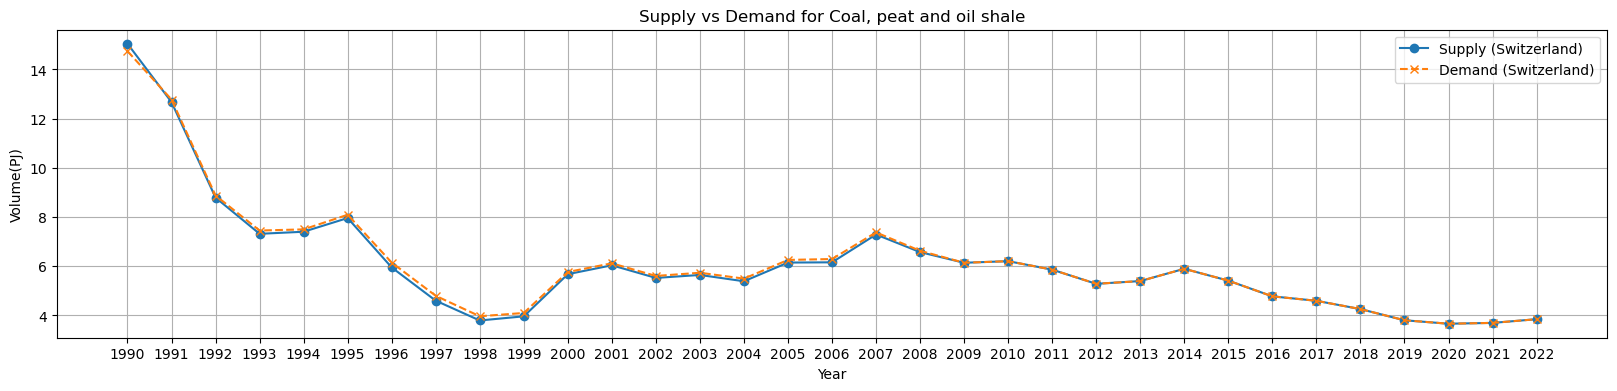

In [202]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = swiz['Country'].unique()
for country in countries:
    country_data = swiz[swiz['Country'] == country]
    plt.plot(country_data['Year'], country_data['coal_peat_oil_shale_total_supply'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['coal_peat_oil_shale_total_consumption'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Coal, peat and oil shale')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

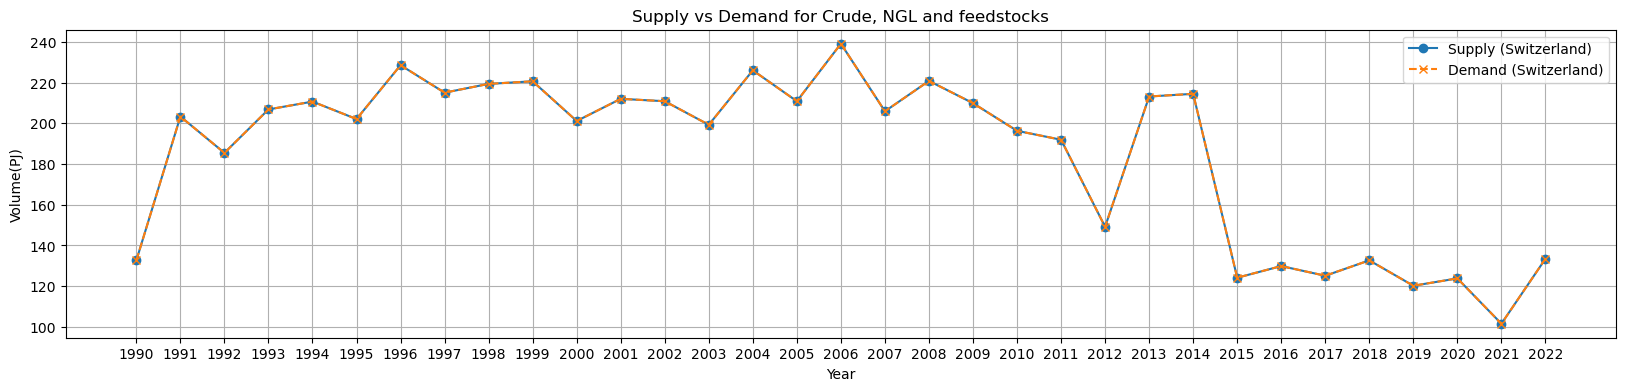

In [204]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = swiz['Country'].unique()
for country in countries:
    country_data = swiz[swiz['Country'] == country]
    plt.plot(country_data['Year'], country_data['crude_NGL_feedstocks_total_supply'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['crude_NGL_feedstocks_total_consumption'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Crude, NGL and feedstocks')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

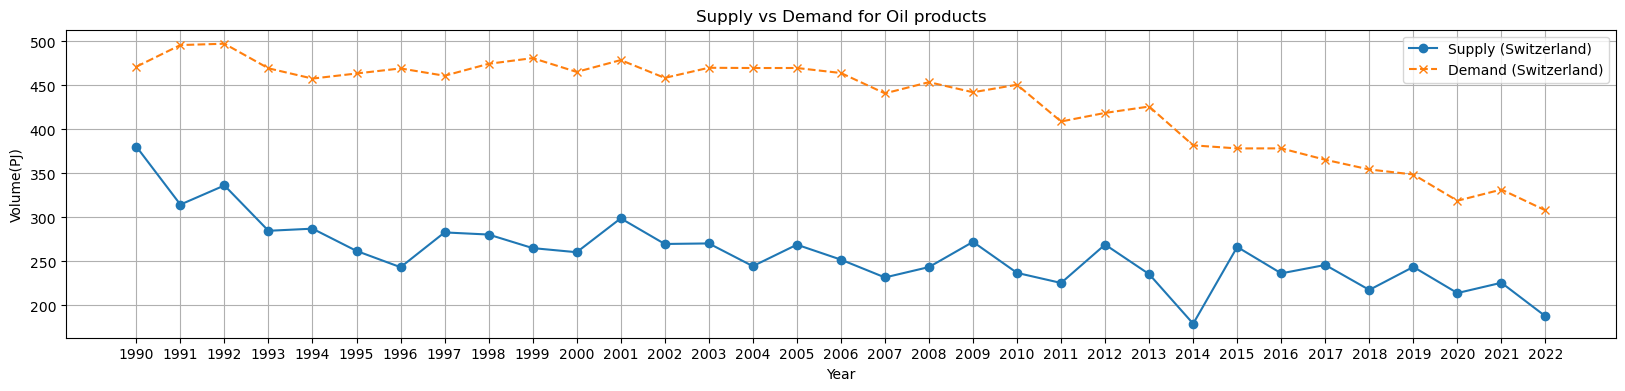

In [206]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = swiz['Country'].unique()
for country in countries:
    country_data = swiz[swiz['Country'] == country]
    plt.plot(country_data['Year'], country_data['oil_products_total_supply'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['oil_products_total_consumption'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Oil products')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

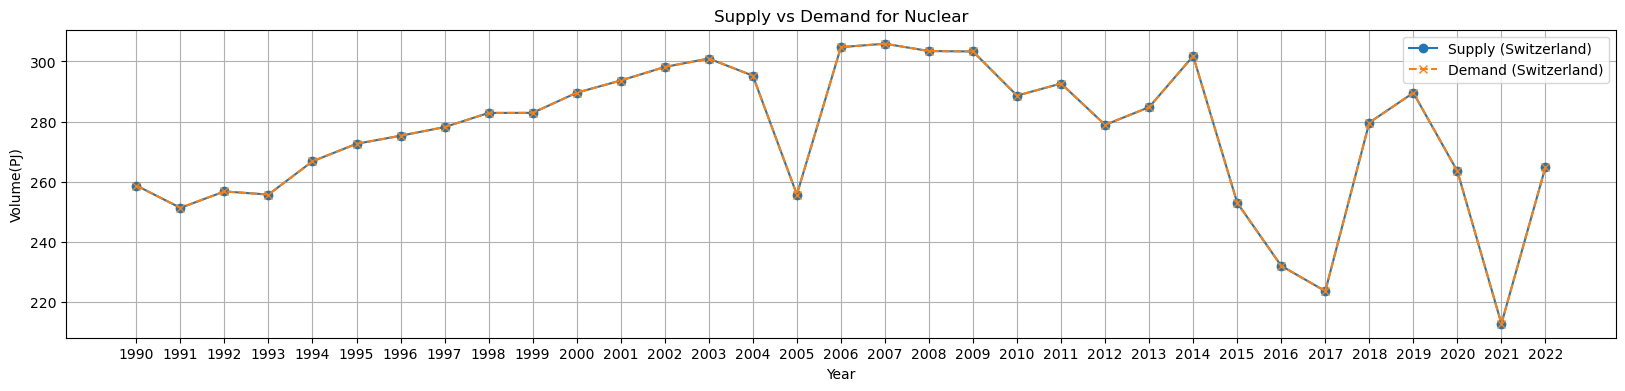

In [208]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = swiz['Country'].unique()
for country in countries:
    country_data = swiz[swiz['Country'] == country]
    plt.plot(country_data['Year'], country_data['nuclear_total_consumption'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['nuclear_total_supply'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Nuclear')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

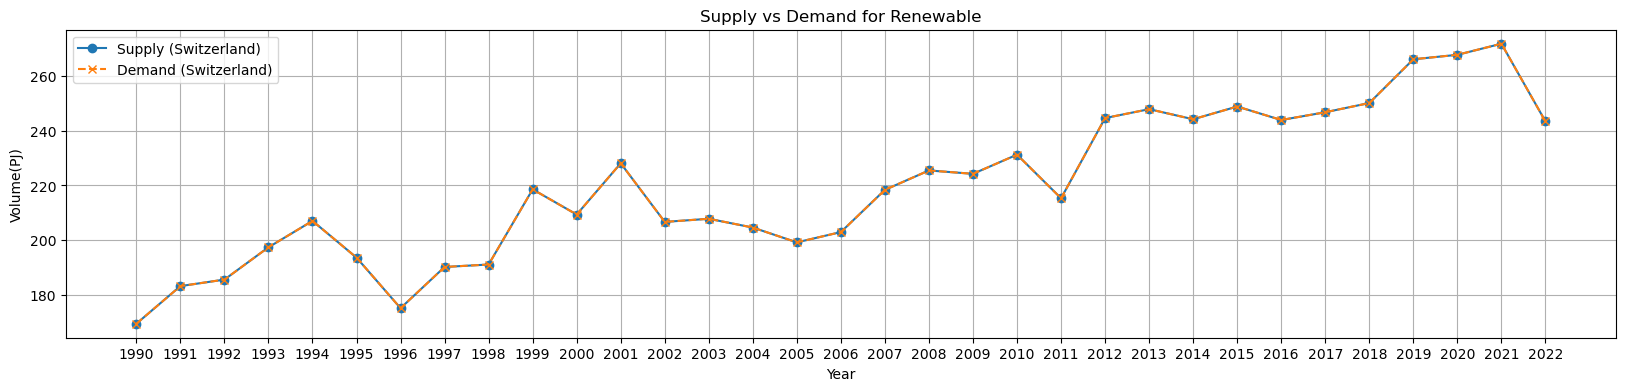

In [210]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = swiz['Country'].unique()
for country in countries:
    country_data = swiz[swiz['Country'] == country]
    plt.plot(country_data['Year'], country_data['renewables_waste_total_consumption'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['renewables_waste_total_supply'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Renewable')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

In [212]:
swiz

,,Country,Year,nuclear_total_supply,renewables_waste_total_supply,nuclear_total_consumption,renewables_waste_total_consumption,coal_peat_oil_shale_total_consumption,crude_NGL_feedstocks_total_consumption,oil_products_total_consumption,coal_peat_oil_shale_total_supply,crude_NGL_feedstocks_total_supply,oil_products_total_supply,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
19,19,Switzerland,1990,258.737273,169.430656,258.737273,169.430656,14.743573,132.619050,471.261598,15.044667,132.619050,380.483602,44773770,0.0273,6.67,6713173,0.0098,0.0012
20,20,Switzerland,1991,251.306365,183.188334,251.306365,183.188334,12.776179,203.291451,495.860401,12.672389,203.291451,314.604400,47086870,0.0517,6.93,6796943,0.0125,0.0013
21,21,Switzerland,1992,256.766362,185.566701,256.766362,185.566701,8.874856,185.438099,497.367402,8.789069,185.438099,336.342998,47043650,-0.0009,6.84,6875051,0.0115,0.0013
22,22,Switzerland,1993,255.728182,197.383144,255.728182,197.383144,7.451118,206.783649,469.422400,7.318225,206.783649,284.819400,44728730,-0.0492,6.45,6938106,0.0092,0.0012
23,23,Switzerland,1994,266.788180,207.029854,266.788180,207.029854,7.498220,210.632101,457.762401,7.402375,210.632101,287.239400,43795880,-0.0209,6.26,6993587,0.0080,0.0012
24,24,Switzerland,1995,272.611818,193.610515,272.611818,193.610515,8.092130,202.057874,463.555600,7.959232,202.057874,261.936399,44582820,0.0180,6.33,7040477,0.0067,0.0012
25,25,Switzerland,1996,275.296364,175.111369,275.296364,175.111369,6.149626,228.514899,469.284202,5.951628,228.514899,243.443198,45133730,0.0124,6.38,7071883,0.0045,0.0012
26,26,Switzerland,1997,278.169091,190.187107,278.169091,190.187107,4.798948,215.013977,460.980199,4.600950,215.013977,282.976802,43847960,-0.0285,6.19,7089163,0.0024,0.0012
27,27,Switzerland,1998,282.881820,191.079816,282.881820,191.079816,3.966398,219.332673,474.533202,3.795397,219.332673,280.552800,45308770,0.0333,6.37,7110291,0.0030,0.0012
28,28,Switzerland,1999,282.911819,218.569641,282.911819,218.569641,4.101130,220.601877,481.023399,3.964330,220.601877,265.156199,45575150,0.0059,6.38,7144121,0.0048,0.0013


In [214]:
swiz.to_csv('Swiz_Analysis_Dataset.csv')

## Brazil

In [216]:
brazil = df1[df1['Country'].isin(['Brazil'])]
brazil  = brazil[brazil['Year']>=1990]

In [218]:
# Rename the data frame columns
brazil = brazil.rename(columns={'Nuclear(Total energy supply (PJ))': 'nuclear_total_supply',
                                        'Nuclear(Total final consumption (PJ)': 'nuclear_total_consumption',
                                        'Renewables and waste(Total energy supply (PJ))': 'renewables_waste_total_supply',
                                        'Renewables and waste(Total final consumption (PJ)': 'renewables_waste_total_consumption',
                                        'Coal, peat and oil shale(Total energy supply (PJ)': 'coal_peat_oil_shale_total_supply',
                                        'Coal, peat and oil shale(Total final consumption(PJ))': 'coal_peat_oil_shale_total_consumption',
                                        'Crude, NGL and feedstocks(Total final consumption(PJ))': 'crude_NGL_feedstocks_total_consumption',
                                        'Crude, NGL and feedstocks(Total energy supply (PJ)': 'crude_NGL_feedstocks_total_supply',
                                        'Oil products(Total energy supply (PJ)': 'oil_products_total_supply',
                                        'Oil products(Total final consumption(PJ))': 'oil_products_total_consumption',
                                        'Fossil CO2 Emissions(Tons)': 'fossil_co2_emissions',
                                        'CO2 emisions change': 'co2_emission_change',
                                        'CO2 emissions per capita': 'co2_emissions_per_capita',
                                        'Population': 'population',
                                        'Pop.': 'pop',
                                        'Share of World\'s': 'share_of_world'})

In [220]:
brazil

,,Country,Year,nuclear_total_supply,renewables_waste_total_supply,nuclear_total_consumption,renewables_waste_total_consumption,coal_peat_oil_shale_total_consumption,crude_NGL_feedstocks_total_consumption,oil_products_total_consumption,coal_peat_oil_shale_total_supply,crude_NGL_feedstocks_total_supply,oil_products_total_supply,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
71,71,Brazil,1990,24.403635,2749.090549,24.403635,2749.090549,153.568789,0.0,2238.056368,404.905604,2567.576528,2529.576964,219750670,0.0007,1.47,149143223,0.0180,0.0061
72,72,Brazil,1991,15.730909,2762.731365,15.730909,2762.731365,181.887952,0.0,2269.237624,462.933994,2520.199290,2442.195580,225990470,0.0284,1.49,151724256,0.0173,0.0062
73,73,Brazil,1992,19.189092,2756.178357,19.189092,2756.178357,166.008868,0.0,2332.079667,448.061204,2588.844149,2529.574171,230088200,0.0181,1.49,154275079,0.0168,0.0063
74,74,Brazil,1993,4.821816,2793.328667,4.821816,2793.328667,174.594718,0.0,2417.853571,461.002942,2615.756083,2550.911184,240413480,0.0449,1.53,156794577,0.0163,0.0066
75,75,Brazil,1994,0.600002,2936.149957,0.600002,2936.149957,183.093177,0.0,2550.579807,473.410189,2681.141761,2709.220418,247389640,0.0290,1.55,159265006,0.0158,0.0068
76,76,Brazil,1995,27.479999,2914.295095,27.479999,2914.295095,186.410935,0.0,2742.410714,496.695010,2697.802437,2656.523243,268124510,0.0838,1.66,161735073,0.0155,0.0074
77,77,Brazil,1996,26.476364,2953.961127,26.476364,2953.961127,200.837916,0.0,2938.612515,511.927756,2938.580180,2841.449037,288845880,0.0773,1.76,164202549,0.0153,0.0080
78,78,Brazil,1997,34.570910,3057.878613,34.570910,3057.878613,210.969477,0.0,3162.870067,515.215332,3098.562665,3070.735660,308449100,0.0679,1.85,166661659,0.0150,0.0085
79,79,Brazil,1998,35.618184,3090.522992,35.618184,3090.522992,203.483240,0.0,3279.151499,503.100772,3345.202829,3281.622331,318211250,0.0316,1.88,169159655,0.0150,0.0088
80,80,Brazil,1999,43.385455,3158.299743,43.385455,3158.299743,206.432728,0.0,3308.985233,510.777823,3446.763150,3387.930182,327433200,0.0290,1.91,171641543,0.0147,0.0090


In [222]:
brazil

,,Country,Year,nuclear_total_supply,renewables_waste_total_supply,nuclear_total_consumption,renewables_waste_total_consumption,coal_peat_oil_shale_total_consumption,crude_NGL_feedstocks_total_consumption,oil_products_total_consumption,coal_peat_oil_shale_total_supply,crude_NGL_feedstocks_total_supply,oil_products_total_supply,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
71,71,Brazil,1990,24.403635,2749.090549,24.403635,2749.090549,153.568789,0.0,2238.056368,404.905604,2567.576528,2529.576964,219750670,0.0007,1.47,149143223,0.0180,0.0061
72,72,Brazil,1991,15.730909,2762.731365,15.730909,2762.731365,181.887952,0.0,2269.237624,462.933994,2520.199290,2442.195580,225990470,0.0284,1.49,151724256,0.0173,0.0062
73,73,Brazil,1992,19.189092,2756.178357,19.189092,2756.178357,166.008868,0.0,2332.079667,448.061204,2588.844149,2529.574171,230088200,0.0181,1.49,154275079,0.0168,0.0063
74,74,Brazil,1993,4.821816,2793.328667,4.821816,2793.328667,174.594718,0.0,2417.853571,461.002942,2615.756083,2550.911184,240413480,0.0449,1.53,156794577,0.0163,0.0066
75,75,Brazil,1994,0.600002,2936.149957,0.600002,2936.149957,183.093177,0.0,2550.579807,473.410189,2681.141761,2709.220418,247389640,0.0290,1.55,159265006,0.0158,0.0068
76,76,Brazil,1995,27.479999,2914.295095,27.479999,2914.295095,186.410935,0.0,2742.410714,496.695010,2697.802437,2656.523243,268124510,0.0838,1.66,161735073,0.0155,0.0074
77,77,Brazil,1996,26.476364,2953.961127,26.476364,2953.961127,200.837916,0.0,2938.612515,511.927756,2938.580180,2841.449037,288845880,0.0773,1.76,164202549,0.0153,0.0080
78,78,Brazil,1997,34.570910,3057.878613,34.570910,3057.878613,210.969477,0.0,3162.870067,515.215332,3098.562665,3070.735660,308449100,0.0679,1.85,166661659,0.0150,0.0085
79,79,Brazil,1998,35.618184,3090.522992,35.618184,3090.522992,203.483240,0.0,3279.151499,503.100772,3345.202829,3281.622331,318211250,0.0316,1.88,169159655,0.0150,0.0088
80,80,Brazil,1999,43.385455,3158.299743,43.385455,3158.299743,206.432728,0.0,3308.985233,510.777823,3446.763150,3387.930182,327433200,0.0290,1.91,171641543,0.0147,0.0090


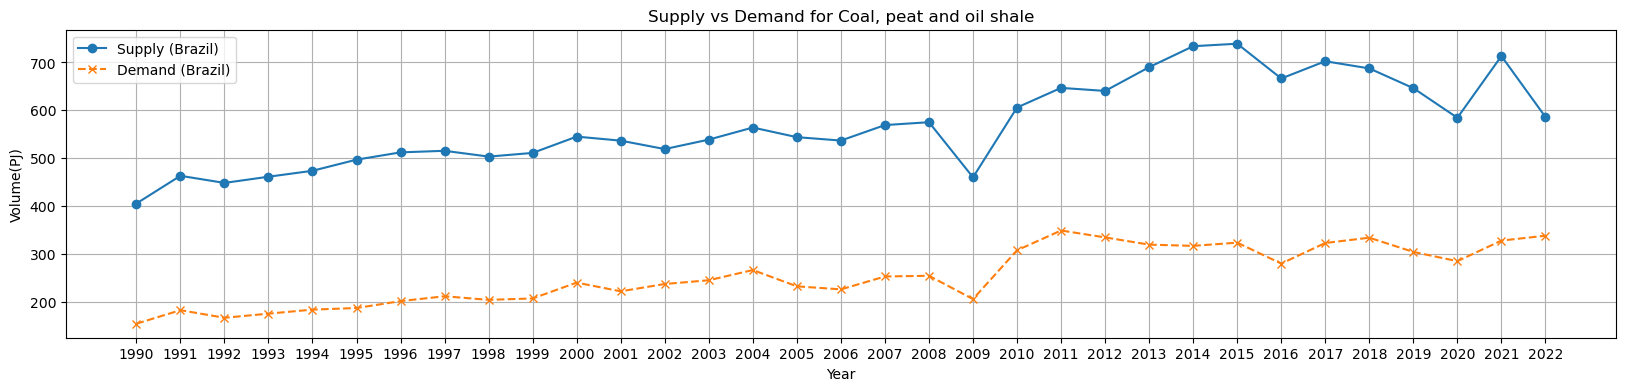

In [224]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = brazil['Country'].unique()
for country in countries:
    country_data = brazil[brazil['Country'] == country]
    plt.plot(country_data['Year'], country_data['coal_peat_oil_shale_total_supply'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['coal_peat_oil_shale_total_consumption'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Coal, peat and oil shale')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

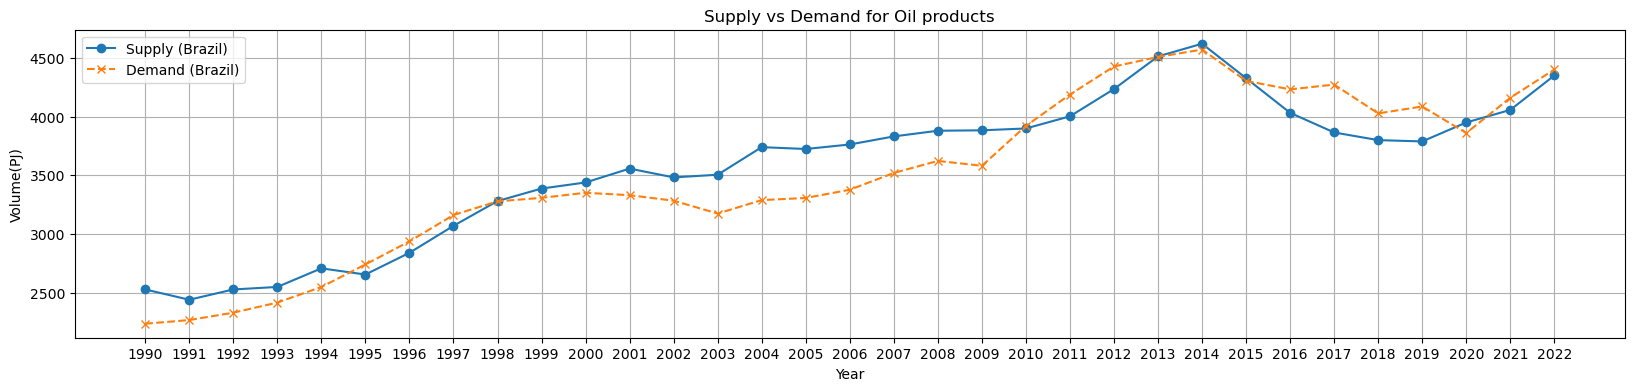

In [226]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = brazil['Country'].unique()
for country in countries:
    country_data = brazil[brazil['Country'] == country]
    plt.plot(country_data['Year'], country_data['oil_products_total_supply'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['oil_products_total_consumption'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Oil products')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

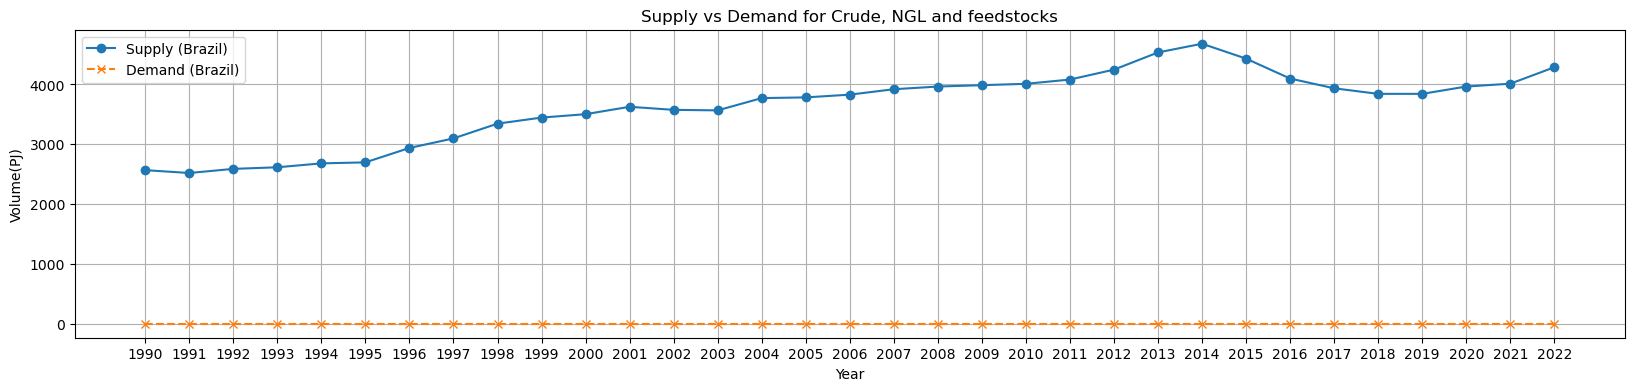

In [228]:
# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through each country and plot supply vs demand
countries = brazil['Country'].unique()
for country in countries:
    country_data = brazil[brazil['Country'] == country]
    plt.plot(country_data['Year'], country_data['crude_NGL_feedstocks_total_supply'], marker='o', label=f'Supply ({country})')
    plt.plot(country_data['Year'], country_data['crude_NGL_feedstocks_total_consumption'], marker='x', linestyle='--', label=f'Demand ({country})')

# Adding titles and labels
plt.title('Supply vs Demand for Crude, NGL and feedstocks')
plt.xlabel('Year')
plt.ylabel('Volume(PJ)')
plt.xticks(country_data['Year'].unique())  # Set x-ticks to years
plt.legend()
plt.grid()

# Show plot
plt.show()

In [234]:
brazil.to_csv('Data/Brazil_Analysis_Dataset.csv')

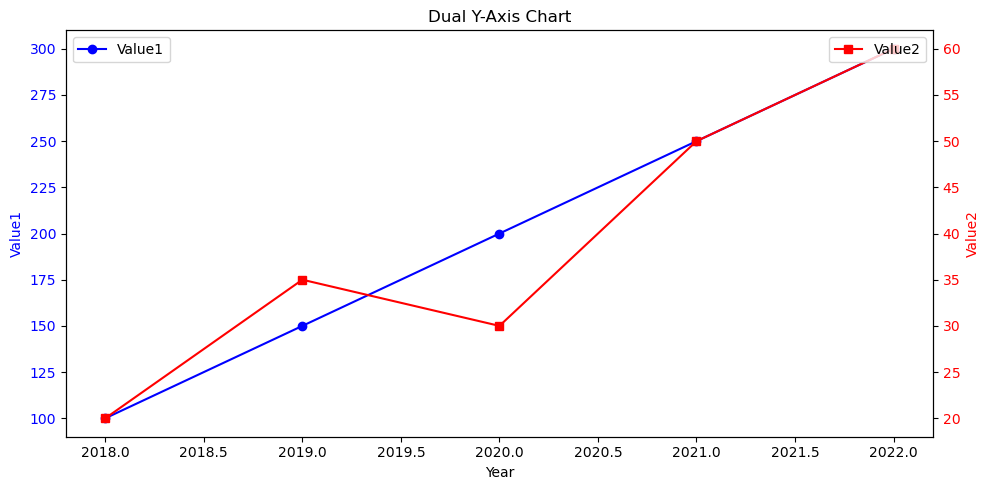

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Value1': [100, 150, 200, 250, 300],
    'Value2': [20, 35, 30, 50, 60]
}
df = pd.DataFrame(data)

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the first y-axis
ax1.plot(df['Year'], df['Value1'], color='b', marker='o', label='Value1')
ax1.set_xlabel('Year')
ax1.set_ylabel('Value1', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Value2'], color='r', marker='s', label='Value2')
ax2.set_ylabel('Value2', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend
plt.title('Dual Y-Axis Chart')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()